Quantum Exact Pattern Matching with Grover Search

In [1]:
from qiskit import QuantumCircuit, QuantumRegister
import math
import numpy as np
import matplotlib.pyplot as plt
#circuit.measure(quantumbits,classicalbits)

In [2]:
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
import numpy as np
import time
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance, run_algorithm
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

# Oracle in CNF form:
# control bits: v1,v2
# Max-terms as CNF
# 0 as line-endings

input_f = '''
c example DIMACS-CNF pattern-matching 1011,01
p cnf 2 4
-1 -2 0
-1 2 0
1 2 0
-1 2 0
'''

#Expected index as anser is: 1 = 01 in binary
oracle = LogicalExpressionOracle(input_f)
grover = Grover(oracle)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1)
start_t = time.time()
result = grover.run(quantum_instance)
print(result['result']) # ~v1^v2 = -1,2 expected

print(time.time()-start_t)

[-1, 2]
0.3128805160522461


In [18]:
inp = '''
p cnf 3 12
-1 -2 -3 0
-1 -2 3 0
-1 2 -3 0
-1 2 3 0
-1 2 -3 0
-1 2 3 0
1 2 -3 0
1 2 3 0
-1 -2 -3 0
-1 2 -3 0
1 -2 -3 0
1 2 -3 0
'''

oracle = LogicalExpressionOracle(inp)
grover = Grover(oracle)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1)
start_t = time.time()
result = grover.run(quantum_instance)
print(result['result'])

print(time.time()-start_t)


[-1, 2, -3]
1.518296718597412


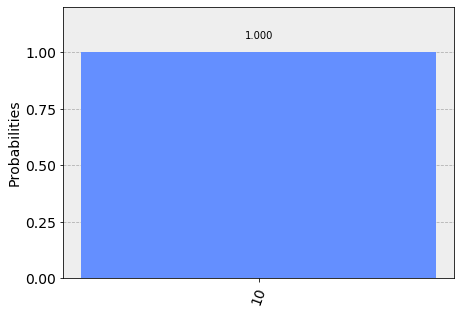

In [9]:
plot_histogram(result['measurement'])